In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

from random import seed
from random import gauss
    
from shapely.ops import polygonize
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely.geometry import MultiLineString
from shapely.geometry import CAP_STYLE, JOIN_STYLE
from shapely.ops import cascaded_union
from shapely.geometry import box
from shapely.geometry import LineString
from shapely.geometry import LinearRing
from shapely.geometry import Point
from shapely.geometry import MultiPoint

class vector(object):
    def __init__(self,x,y):
        self.x = float(x)
        self.y = float(y)
    def get_angle(self):
        return(np.angle(self.x + self.y*1j)) #Check
    def get_length(self):
        return math.sqrt(self.x*self.x + self.y*self.y)
    def set_angle(self,angle):
        l = self.get_length()
        self.x = math.cos(angle)*l
        self.y = math.sin(angle)*l
    def set_length(self,l):
        angle = self.get_angle()
        self.x = math.cos(angle)*l
        self.y = math.sin(angle)*l
    def add_v(self,v):
        self.x += v.x
        self.y += v.y
    def sub_v(self,v):
        self.x -= v.x
        self.y -= v.y
    def sclar_multi(self,k):
        self.x = self.x*k
        self.y = self.y*k
    def rotate_vector(self,angle,clockwise):
        if clockwise:
            self.set_angle(self.get_angle() - angle)
        else:
            self.set_angle(self.get_angle() + angle)

class line(object):
    def __init__(self,point1,point2):
        self.x1 = float(point1[0])
        self.x2 = float(point2[0])
        self.y1 = float(point1[1])
        self.y2 = float(point2[1])
        self.d = math.sqrt((self.y2-self.y1)*(self.y2-self.y1) + (self.x2-self.x1)*(self.x2-self.x1))
        if self.x1 == self.x2:
            self.m = float(1000000)
        else:
            self.m = float((self.y2 - self.y1)/(self.x2 - self.x1))
        self.c = float((self.y1 - self.m*self.x1))
    def distance_from_line(self,point):
        return abs((self.m*point[0] -  point[1] + self.c)/math.sqrt(1 + self.m*self.m))    
        



In [21]:
def line_intersect(m1, b1, m2, b2):
    if m1 == m2:
        print ("These lines are parallel!!!")
        return None
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x,y

#t = line_intersect(1,0,-1,0)
#print(t)

In [22]:
def distance_points(x1,y1,x2,y2):
    return math.sqrt((x1-x2)*(x1-x2) + (y1-y2)*(y1-y2)) 

In [23]:
def plot_coords(coords):
    pts = list(coords)
    x,y = zip(*pts)
    plt.plot(x,y)

In [24]:
def plot_polys(polys):

    plot_coords(polys.exterior.coords)

    for hole in polys.interiors:
        plot_coords(hole.coords)

In [25]:
def plot_ring(ring):
    plot_coords(ring.coords)
    

In [26]:
def generate_polygon(n = 10,u =1):
    
    angle = 2*math.pi/n
    coords = []
    for i in range(n):
        length = abs(gauss(u,1)) #Ye shi karna baaki hai
        
        coords.append((length*math.cos(i*angle),length*math.sin(i*angle)))
    return coords  

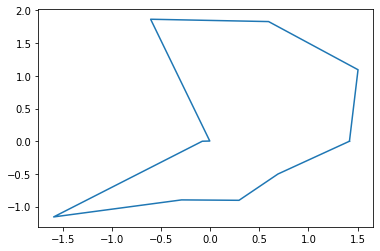

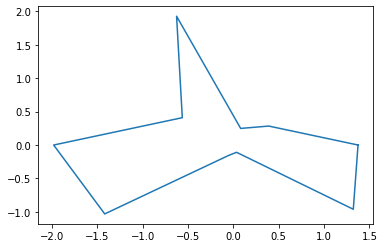

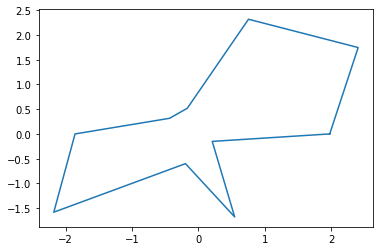

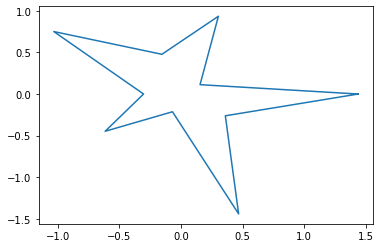

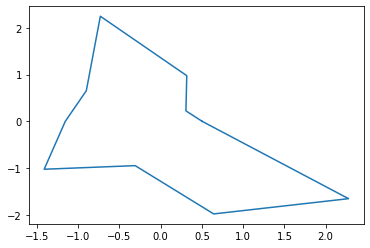

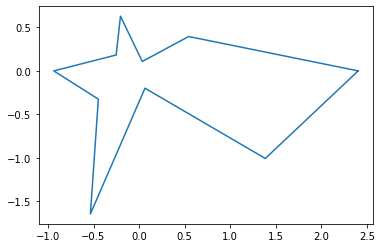

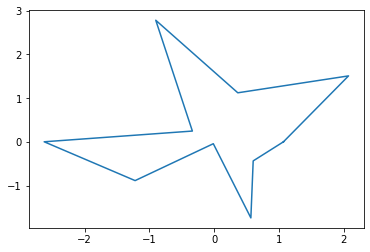

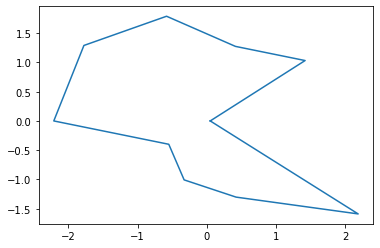

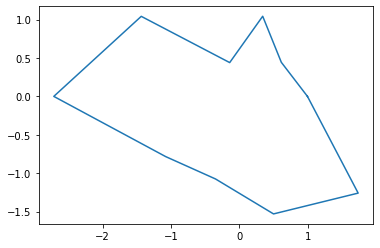

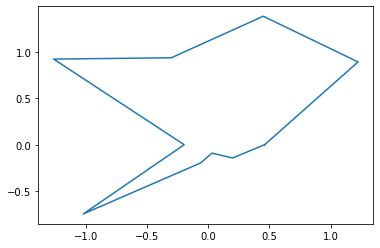

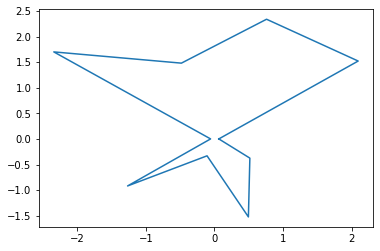

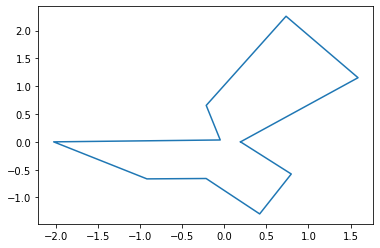

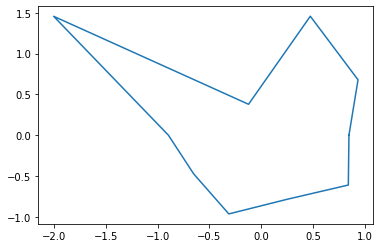

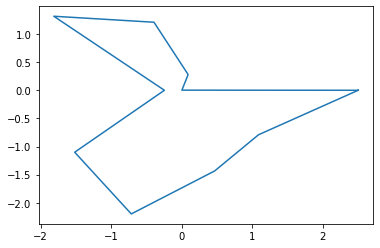

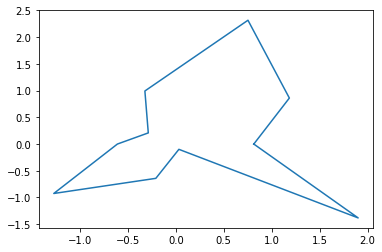

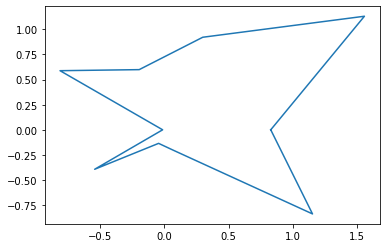

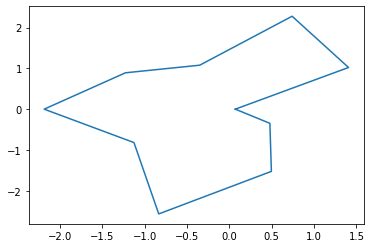

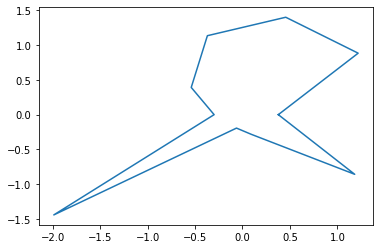

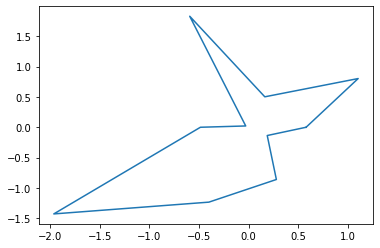

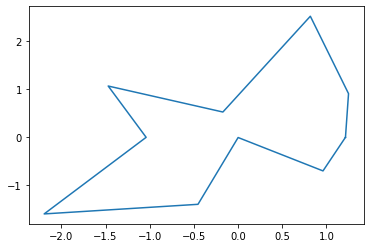

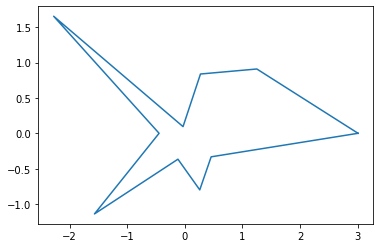

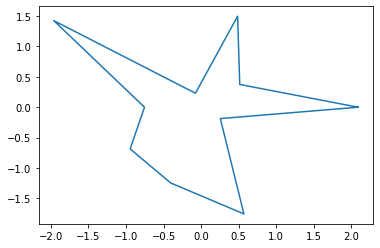

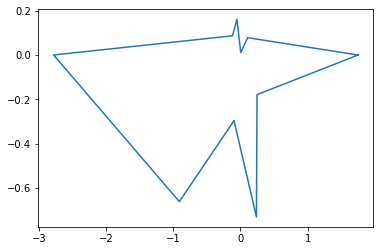

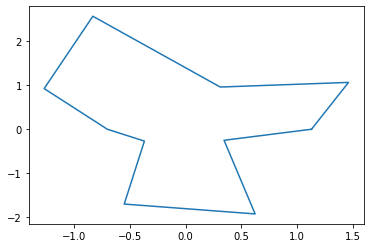

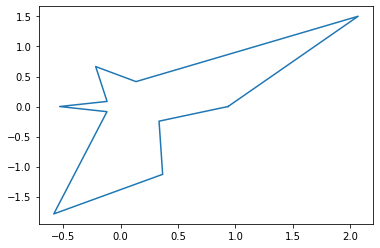

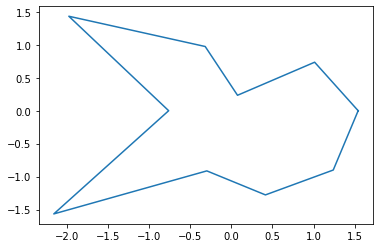

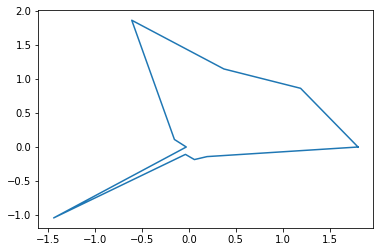

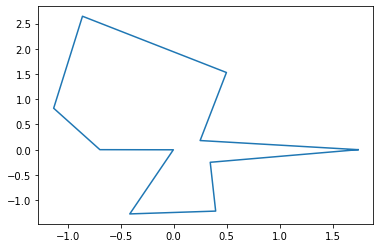

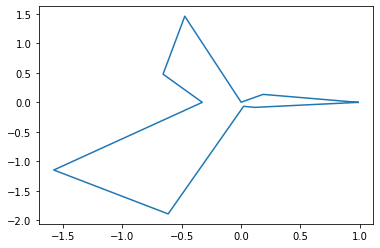

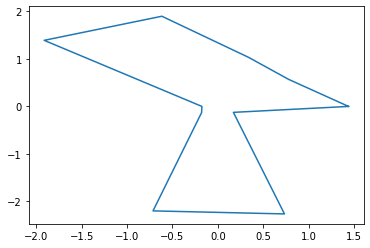

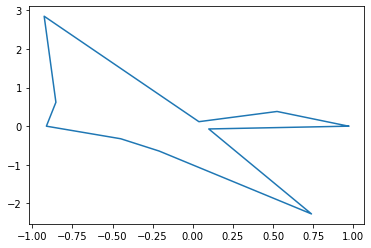

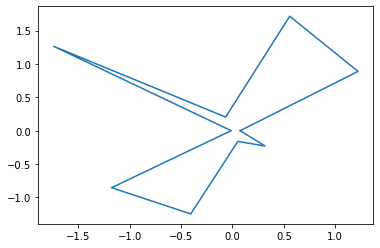

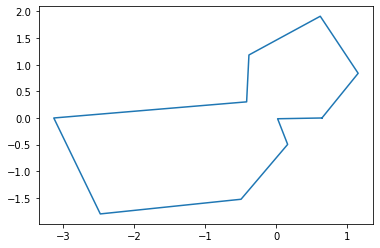

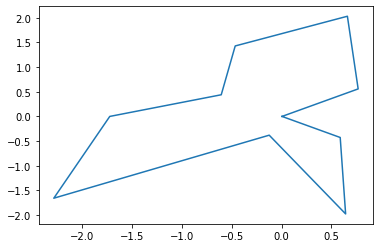

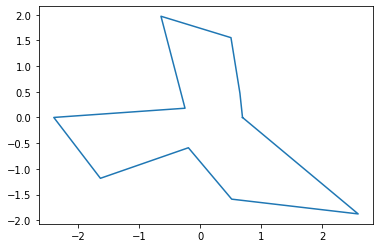

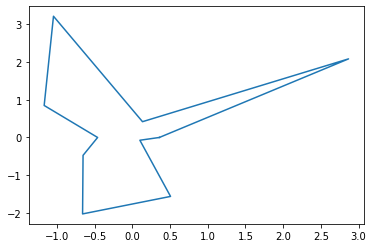

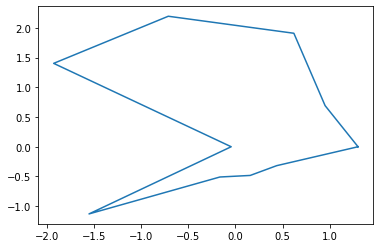

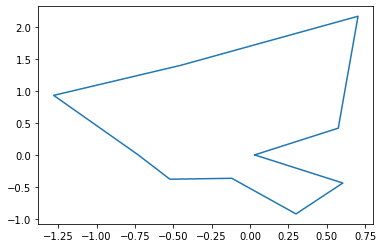

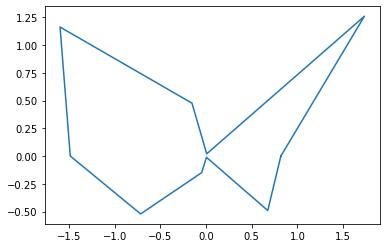

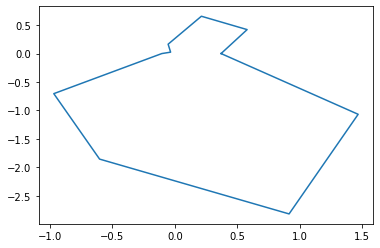

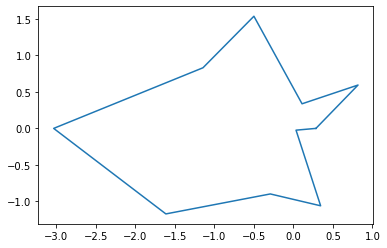

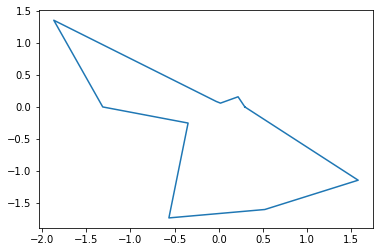

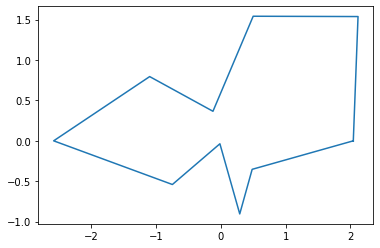

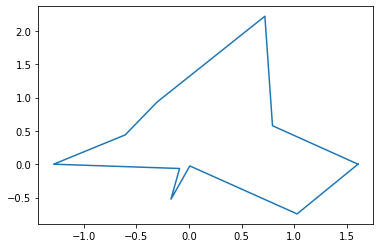

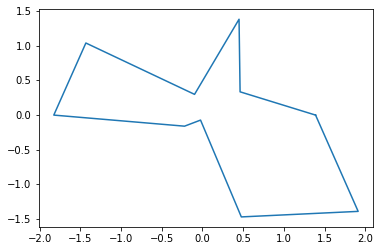

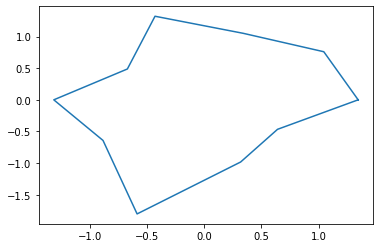

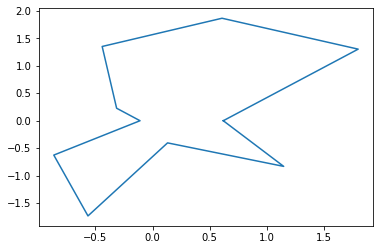

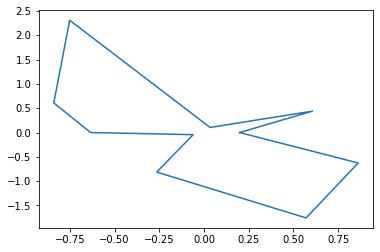

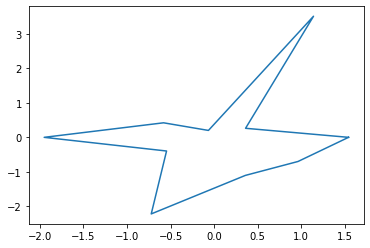

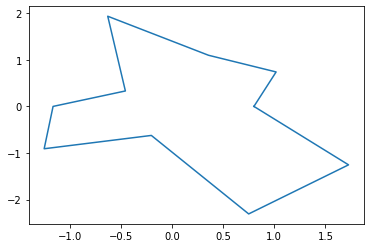

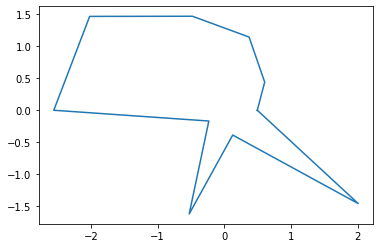

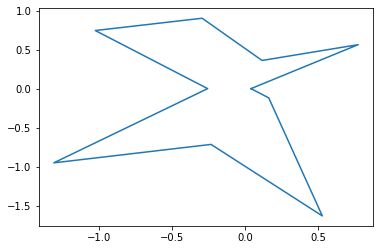

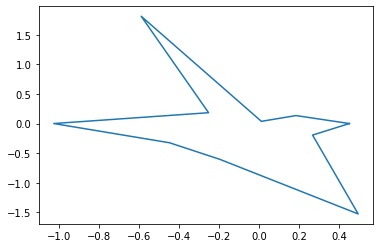

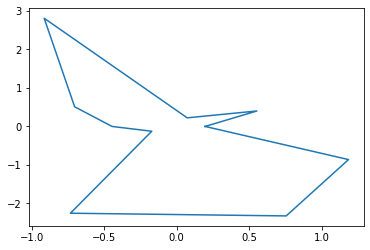

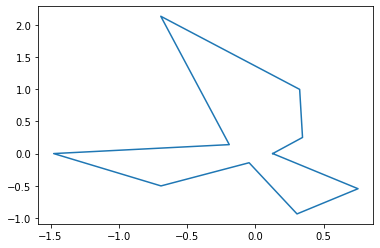

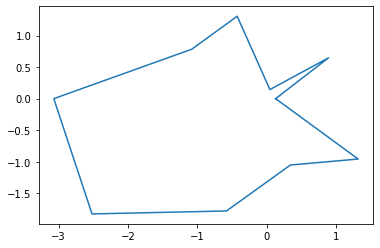

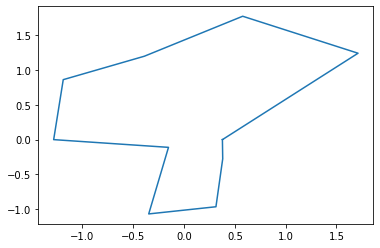

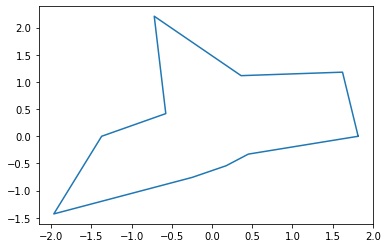

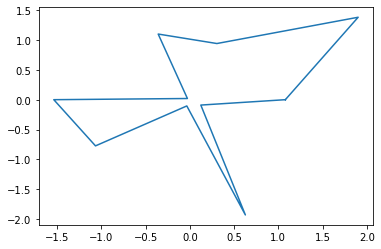

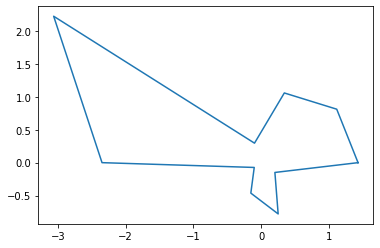

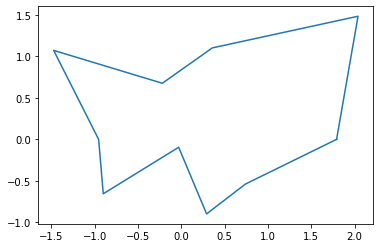

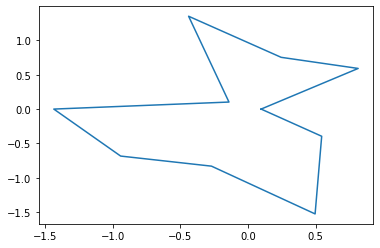

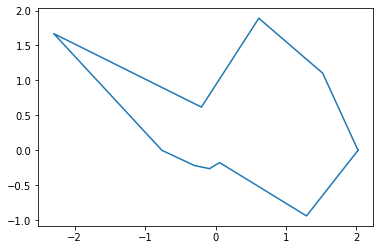

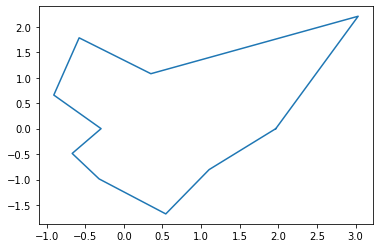

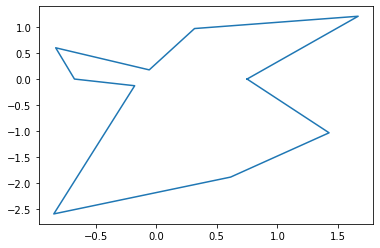

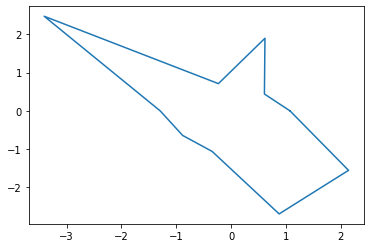

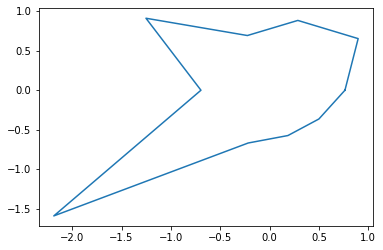

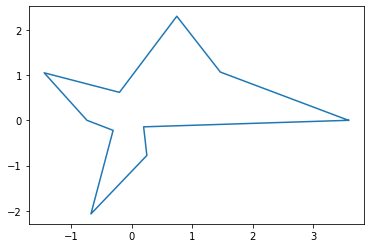

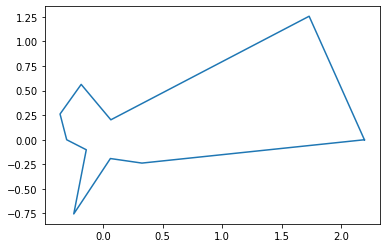

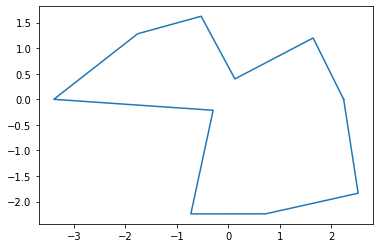

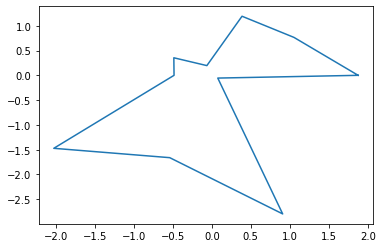

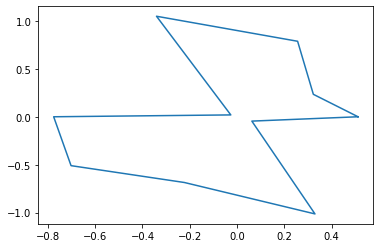

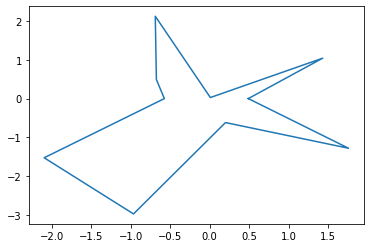

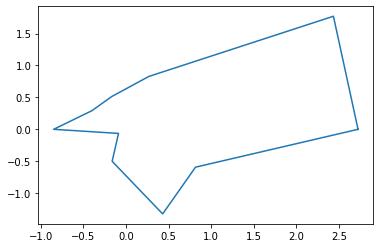

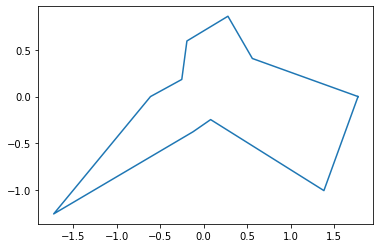

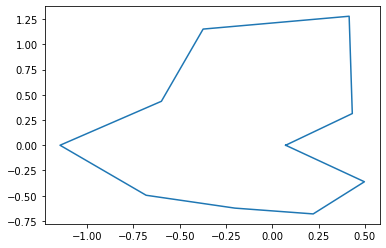

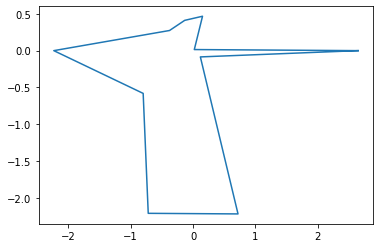

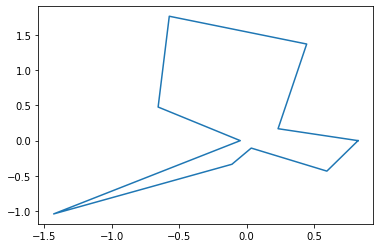

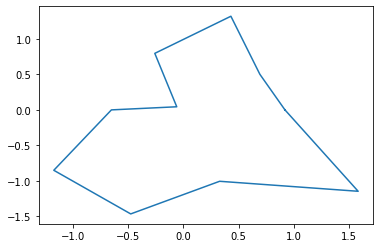

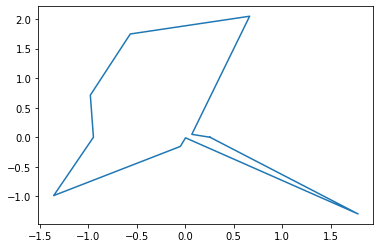

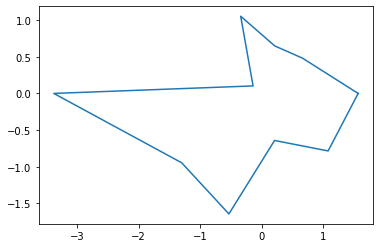

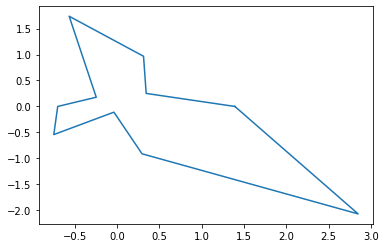

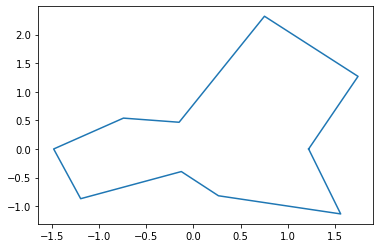

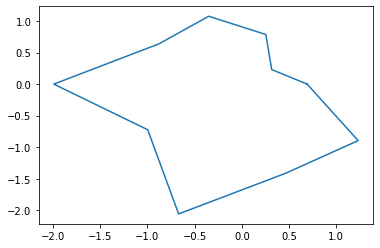

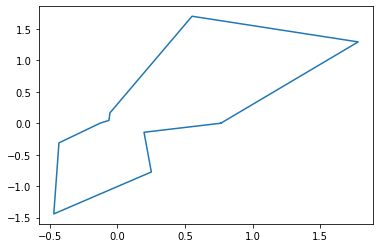

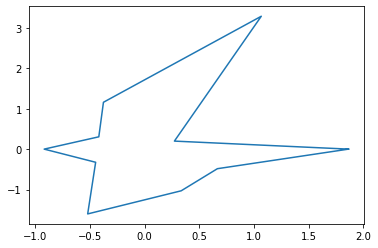

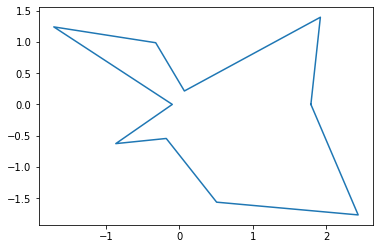

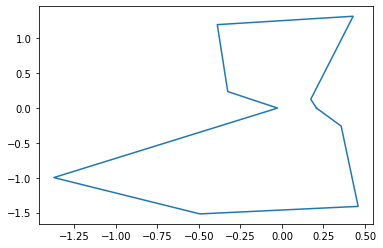

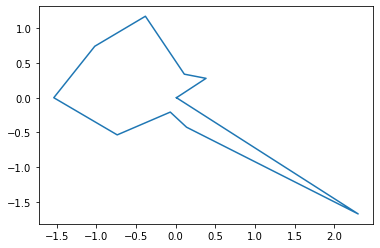

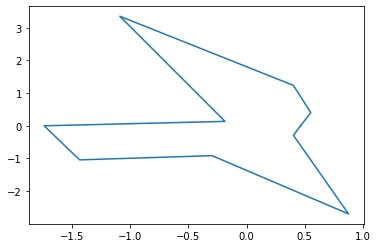

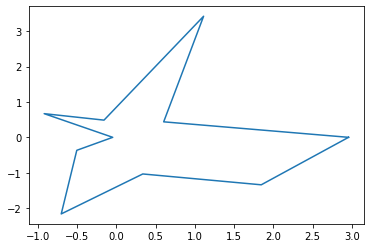

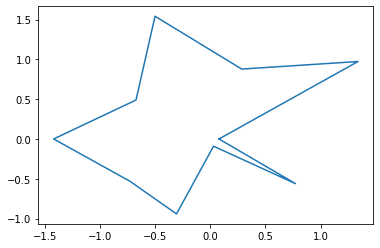

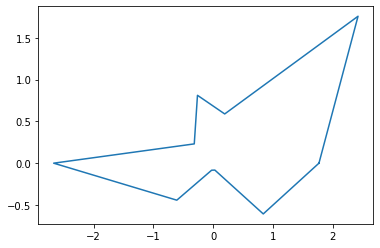

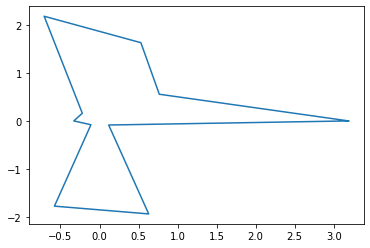

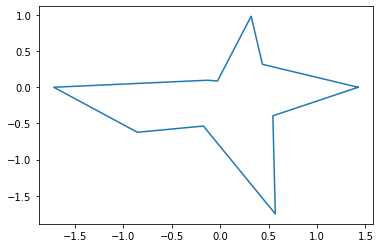

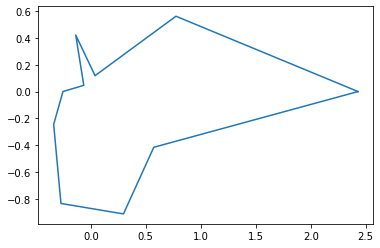

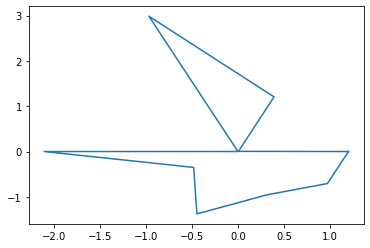

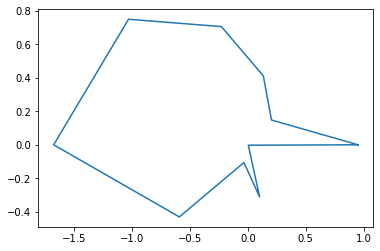

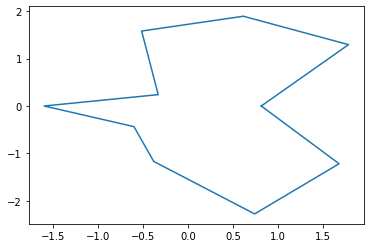

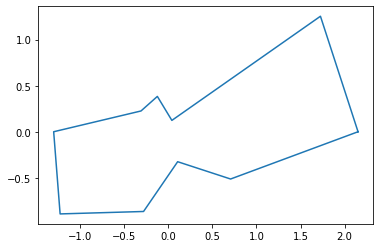

In [27]:
for i in range(100):
    coords = generate_polygon(10)
    r = LinearRing(coords)
    s = Polygon(r)
    plot_polys(s)
    plt.show()

In [28]:
def random_p(polygon):
    return polygon.representative_point()
    

In [29]:
def random_velocity(u = 0,v = 0):
    return (abs(u + gauss(0,1)),abs(v+ gauss(0,1)))

In [30]:
def inside_polygon(polygon,point):
    return polygon.contains(point)



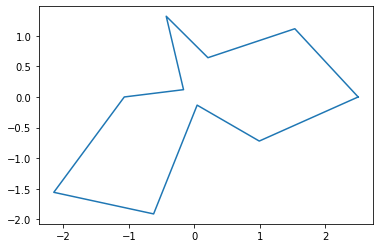

In [31]:
coords = generate_polygon()
#print(coords)
r = LinearRing(coords)
polygon = Polygon(r)
plot_polys(polygon)
plt.show()
line_segments = []
for i in range(9):
    l = line(coords[i],coords[i+1])
    line_segments.append(l)
l = line(coords[9],coords[0])
line_segments.append(l)
    



In [90]:
coords

[(2.5026690783008667, 0.0),
 (1.5355834307417497, 1.115666667734256),
 (0.20861774146949738, 0.6420593884833552),
 (-0.42889395688372206, 1.319999870294985),
 (-0.16433626420094632, 0.11939728483551247),
 (-1.0693294015225787, 1.3095508288087808e-16),
 (-2.1458943118473957, -1.559083478161931),
 (-0.6213532395152911, -1.9123286360267227),
 (0.04341896784835477, -0.1336298425480232),
 (0.992273993853086, -0.7209292559679974)]

In [146]:
random_point = random_p(polygon)

In [147]:
random_point.x

-0.7153503457184991

In [148]:
random_point.y

-0.4272795492580103

In [149]:
inside_polygon(polygon,random_point)

True

In [150]:
velocity = vector(1,1)

In [151]:
velocity.set_length(0.01)

In [152]:
velocity.x

0.007071067811865476

In [153]:
velocity.y

0.007071067811865476

In [154]:
position = vector(random_point.x,random_point.y)

In [155]:
position.x

-0.7153503457184991

In [156]:
position.y

-0.4272795492580103

In [157]:
collision_data = []

In [158]:
 p = Point(0.4372337076155729, 0.7253045040760617)
inside_polygon(polygon,p)

False

In [159]:
p = Point(0.4202123622282725, 0.7192294162699179)
inside_polygon(polygon,p)

False

In [138]:
for i in range(10):
    print(line_segments[i].m,line_segments[i].c,line_segments[i].d)

-1.1536379125780132 2.887173931364552 1.4764710505824674
0.3569099661579352 0.567601637435532 1.4089506007895467
-1.0634165358264693 0.8639069444287901 0.9306043533189552
-4.538150349304278 -0.6263853899513723 1.2294052793808898
0.13193170192303771 0.1410784478592173 0.912835302902634
1.448202020342211 1.548604999696326 1.8946591508818111
-0.23170589777842412 -2.0562998462261453 1.5649305488686853
2.675651559701427 -0.2498038715920996 1.8988658419187268
-0.6189558966588071 -0.10675541637144487 1.1159061167400621
0.47731170697736885 -1.1945532497632652 1.673628484232564


In [160]:
#print(position.x, position.y)
prevx = 0
prevy = 0
collision_count = 0
for i in range(1000):
    prevx = position.x
    prevy = position.y
    position.add_v(velocity)
    print(i, "   ", position.x,position.y)
    
    if inside_polygon_1(polygon,position):
        continue
    else:
        print("This is collision number ",collision_count+1)
        print(position.x,position.y, " position coordinates")
        prev = vector(prevx,prevy)
        print(prev.x,prev.y,"   prev coordinates ")
        print(velocity.x,velocity.y," velocity")
        collision_data.append(collision_data_f(position,prev,line_segments,velocity))
        angle = collision_data[collision_count][1]
        print(angle)
        velocity.rotate_vector(math.pi + 2*angle,False)
        velocity.x = 0 - velocity.x
        velocity.y = 0 - velocity.y
        print(velocity.x,velocity.y," velocity new")
        collision_count = collision_count+1
        position.x = prevx
        position.y = prevy
        print(position.x,position.y, " position coordinates")
print(collision_data)
        

0     -0.7082792779066336 -0.42020848144614487
1     -0.7012082100947681 -0.4131374136342794
2     -0.6941371422829026 -0.40606634582241397
3     -0.6870660744710371 -0.3989952780105485
4     -0.6799950066591716 -0.39192421019868307
5     -0.6729239388473061 -0.3848531423868176
6     -0.6658528710354406 -0.37778207457495216
7     -0.658781803223575 -0.3707110067630867
8     -0.6517107354117095 -0.36363993895122126
9     -0.644639667599844 -0.3565688711393558
10     -0.6375685997879785 -0.34949780332749036
11     -0.630497531976113 -0.3424267355156249
12     -0.6234264641642475 -0.33535566770375946
13     -0.616355396352382 -0.328284599891894
14     -0.6092843285405165 -0.32121353208002856
15     -0.602213260728651 -0.3141424642681631
16     -0.5951421929167855 -0.30707139645629766
17     -0.58807112510492 -0.3000003286444322
18     -0.5810000572930545 -0.29292926083256676
19     -0.573928989481189 -0.2858581930207013
20     -0.5668579216693235 -0.27878712520883586
21     -0.55978685385

284     1.6440965040067697 0.5967238755661546
285     1.6540467815822046 0.5957278955604329
286     1.6639970591576396 0.5947319155547113
287     1.6739473367330746 0.5937359355489896
288     1.6838976143085096 0.592739955543268
289     1.6938478918839446 0.5917439755375463
290     1.7037981694593796 0.5907479955318247
291     1.7137484470348145 0.589752015526103
292     1.7236987246102495 0.5887560355203814
293     1.7336490021856845 0.5877600555146597
294     1.7435992797611195 0.586764075508938
295     1.7535495573365545 0.5857680955032164
296     1.7634998349119895 0.5847721154974947
297     1.7734501124874245 0.5837761354917731
298     1.7834003900628594 0.5827801554860514
299     1.7933506676382944 0.5817841754803298
300     1.8033009452137294 0.5807881954746081
301     1.8132512227891644 0.5797922154688865
302     1.8232015003645994 0.5787962354631648
303     1.8331517779400344 0.5778002554574432
304     1.8431020555154694 0.5768042754517215
305     1.8530523330909043 0.57580829

459     1.535716026296114 0.07794496782069185
460     1.527679913233908 0.08389651273369071
461     1.519643800171702 0.08984805764668957
462     1.5116076871094961 0.09579960255968843
463     1.5035715740472901 0.10175114747268729
464     1.4955354609850842 0.10770269238568615
465     1.4874993479228782 0.11365423729868501
466     1.4794632348606722 0.11960578221168387
467     1.4714271217984662 0.12555732712468273
468     1.4633910087362603 0.13150887203768158
469     1.4553548956740543 0.13746041695068043
470     1.4473187826118483 0.14341196186367927
471     1.4392826695496423 0.14936350677667812
472     1.4312465564874364 0.15531505168967696
473     1.4232104434252304 0.1612665966026758
474     1.4151743303630244 0.16721814151567466
475     1.4071382173008185 0.1731696864286735
476     1.3991021042386125 0.17912123134167235
477     1.3910659911764065 0.1850727762546712
478     1.3830298781142005 0.19102432116767004
479     1.3749937650519946 0.1969758660806689
480     1.3669576519

668     0.37237846990133733 -0.10794924245654718
669     0.3699266860758793 -0.11764402229279011
670     0.3674749022504213 -0.12733880212903304
671     0.36502311842496327 -0.13703358196527599
672     0.36257133459950525 -0.14672836180151894
673     0.3601195507740472 -0.1564231416377619
674     0.3576677669485892 -0.16611792147400484
675     0.3552159831231312 -0.1758127013102478
676     0.35276419929767316 -0.18550748114649074
677     0.35031241547221514 -0.1952022609827337
678     0.3478606316467571 -0.20489704081897664
679     0.3454088478212991 -0.2145918206552196
680     0.3429570639958411 -0.22428660049146254
681     0.34050528017038306 -0.2339813803277055
682     0.33805349634492504 -0.24367616016394844
683     0.335601712519467 -0.2533709400001914
684     0.333149928694009 -0.26306571983643434
685     0.330698144868551 -0.2727604996726773
686     0.32824636104309296 -0.28245527950892024
687     0.32579457721763494 -0.2921500593451632
688     0.3233427933921769 -0.301844839181

945     1.1841501221355293 0.43027624231220113
946     1.1766211452894269 0.42369486649472554
947     1.1690921684433244 0.41711349067724995
948     1.161563191597222 0.41053211485977437
949     1.1540342147511196 0.4039507390422988
950     1.1465052379050171 0.3973693632248232
951     1.1389762610589147 0.3907879874073476
952     1.1314472842128123 0.384206611589872
953     1.1239183073667098 0.37762523577239643
954     1.1163893305206074 0.37104385995492084
955     1.108860353674505 0.36446248413744525
956     1.1013313768284025 0.35788110831996967
957     1.0938023999823 0.3512997325024941
958     1.0862734231361977 0.3447183566850185
959     1.0787444462900952 0.3381369808675429
960     1.0712154694439928 0.3315556050500673
961     1.0636864925978904 0.3249742292325917
962     1.056157515751788 0.31839285341511614
963     1.0486285389056855 0.31181147759764055
964     1.041099562059583 0.30523010178016496
965     1.0335705852134807 0.2986487259626894
966     1.0260416083673782 0.29

In [105]:
def inside_polygon_1(polygon,vector):
    point = Point(vector.x,vector.y)
    return polygon.contains(point)

In [106]:
def collision_data_f(position,prev,line_segments,velocity):
    point = [position.x,position.y]
    minm_distance = line_segments[9].distance_from_line(point)
    index = 9
    
    for i in range(9):
        if (line_segments[i].distance_from_line(point) < minm_distance):
            index = i
            minm_distance = line_segments[i].distance_from_line(point)
    d = line_segments[index].d
    #m_rad = math.atan(line_segments[index].m)
    prev_tuple = (prev.x,prev.y)
    position_tuple = (position.x,position.y)
    velocity_line = line(prev_tuple,position_tuple)
    intersect = line_intersect(velocity_line.m,velocity_line.c,line_segments[index].m, line_segments[index].c)
    acute_angle = math.atan(abs((velocity_line.m - line_segments[index].m)/(1 + line_segments[index].m*velocity_line.m)))
    #print(acute_angle)
    d1 = distance_points(intersect[0],intersect[1], line_segments[index].x1,line_segments[index].y1)
    d2 = distance_points(intersect[0],intersect[1], prev.x, prev.y)
    d3 = distance_points(prev.x,prev.y, line_segments[index].x1,line_segments[index].y1)
    #print(d1,d1*d1,d2,d2*d2,d3,d3*d3)
    #print(d1*d1+d2*d2)
    #print(d3*d3)
    if ((d1*d1 + d2*d2) < d3*d3):
        angle = math.pi - acute_angle
    else:
        angle = acute_angle
    return (d,angle)
    
        
    
    


In [20]:
v = vector(-3,-3)

In [21]:
v.get_angle()

-2.356194490192345